In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

mouse_drug.head()
clinical_trial.head()
# Combine the data into a single dataset
data_merge = pd.merge(clinical_trial, mouse_drug, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_merge.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
5,h246,0,45.0,0,Ketapril
6,p189,0,45.0,0,Ketapril
7,n923,0,45.0,0,Ketapril
8,q119,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol


In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tum_vol = data_merge.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
#mean_tum_vol.head()

# Convert to DataFrame and preview
mean_tum_vol = pd.DataFrame(mean_tum_vol)
mean_tum_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sterr_tum_vol = data_merge.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
sterr_tum_vol = pd.DataFrame(sterr_tum_vol)
# Preview DataFrame
sterr_tum_vol.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
mean_tum_vol = mean_tum_vol.reset_index()
mean_tum_vol_pivot = mean_tum_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

sterr_tum_vol = sterr_tum_vol.reset_index()
sterr_tum_vol_pivot = sterr_tum_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
mean_tum_vol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


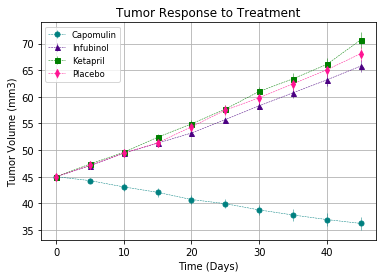

In [6]:
plt.errorbar(mean_tum_vol_pivot.index, mean_tum_vol_pivot["Capomulin"], 
             yerr=sterr_tum_vol_pivot["Capomulin"], color="#008080", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(mean_tum_vol_pivot.index, mean_tum_vol_pivot["Infubinol"], 
             yerr=sterr_tum_vol_pivot["Infubinol"], color="#4B0082", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(mean_tum_vol_pivot.index, mean_tum_vol_pivot["Ketapril"], 
             yerr=sterr_tum_vol_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(mean_tum_vol_pivot.index, mean_tum_vol_pivot["Placebo"], 
             yerr=sterr_tum_vol_pivot["Placebo"], color="#FF1493", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(["Capomulin", "Infubinol","Ketapril","Placebo"], loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Fig1.png")

# Show the Figure
plt.show()

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = data_merge.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_met_site = pd.DataFrame(mean_met_site)

# Preview DataFrame
mean_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sterr_met_site = data_merge.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
sterr_met_site = pd.DataFrame(sterr_met_site)
# Preview DataFrame
sterr_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site = mean_met_site.reset_index()
mean_met_site_pivot = mean_met_site.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

sterr_met_site = sterr_met_site.reset_index()
sterr_met_site_pivot = sterr_met_site.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
mean_met_site_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


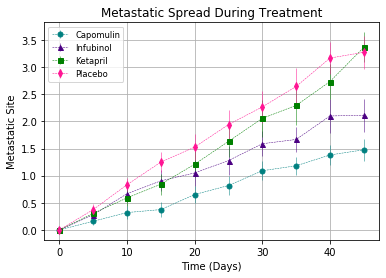

In [10]:
plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot["Capomulin"], 
             yerr=sterr_met_site_pivot["Capomulin"], color="#008080", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot["Infubinol"], 
             yerr=sterr_met_site_pivot["Infubinol"], color="#4B0082", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot["Ketapril"], 
             yerr=sterr_met_site_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot["Placebo"], 
             yerr=sterr_met_site_pivot["Placebo"], color="#FF1493", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Site")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(["Capomulin", "Infubinol","Ketapril","Placebo"], loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Fig2.png")

# Show the Figure
plt.show()


In [56]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = data_merge.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [58]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pivot.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


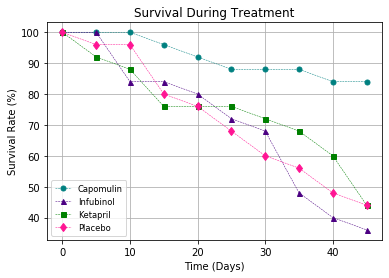

In [68]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, color="#008080", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, color="#4B0082", marker="^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, color="g", marker="s", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Placebo"] / 25 , color="#FF1493", marker="d", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(["Capomulin", "Infubinol","Ketapril","Placebo"], loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Fig3.png")

# Show the Figure
plt.show()

In [71]:
tum_per_change =  100 * ((mean_tum_vol_pivot.iloc[-1] - mean_tum_vol_pivot.iloc[0]) / mean_tum_vol_pivot.iloc[0])
#.iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

tum_per_change_sterr =  100 * (sterr_tum_vol_pivot.iloc[-1] - sterr_tum_vol_pivot.iloc[0]) / sterr_tum_vol_pivot.iloc[0]

# Display the data to confirm
tum_per_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

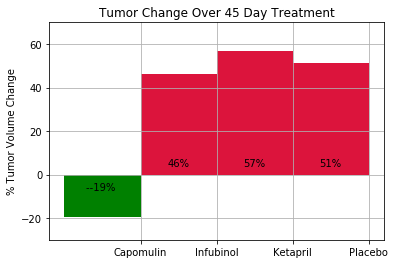

In [76]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tum_per_change["Capomulin"], 
               tum_per_change["Infubinol"], 
               tum_per_change["Ketapril"], 
               tum_per_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='#DC143C')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="black")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="black")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Fig4.png")

# Show the Figure
fig.show()